# Steady state response for noisy continuous system

In [15]:
try: 
    %reload_ext autoreload
except:
    %load_ext autoreload
%autoreload 2
%run basic_material

from sympy import Matrix, init_printing
init_printing()

from IPython.display import Latex

Running Python: 3.8.16


In [16]:
# model params
tau = 1.0
Ea = 10
umax = np.pi
delmax = np.pi/12.
phimax = np.pi/180.

# model
A = np.array([[0, 0, 0],[Ea/tau, -1/tau, 0], [0, 1, 0]]) # cts A matrix
Bu = np.array([[1],[0],[0]]) # cts control input matrix
Bw = np.array([[0],[1],[0]]) # cts noise input matrix
Wc = np.array([1000]) # cts noise input matrix

# some control weights for LQR
Ruu = 1/umax**2
Rxx = np.diag([1/delmax**2, 0, 1/phimax**2])
K,_ = lqr(A,Bu,Rxx,Ruu)

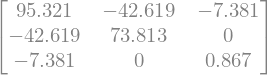

In [17]:
Qss = la.solve_continuous_lyapunov((A-Bu@K), -Bw@np.atleast_2d(Wc)@Bw.T)
display(Matrix(np.round(Qss,3)))

In [18]:
Latex(f"$\sqrt E[\phi^2] =$ {sqrt(Qss[-1,-1]):3.2f}")

<IPython.core.display.Latex object>